In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Pandas is used for data manipulation

energy = pd.read_csv('HomeC.csv', low_memory=False)

energy.head(5)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [2]:
print('The shape of our dataset: ',energy.shape)

The shape of our dataset:  (503911, 32)


In [3]:
#Descriptive statistics for each column 

energy.describe()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,...,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,...,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,...,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,...,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,...,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,...,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,...,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,...,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


In [4]:
#changing column names, dropping the "[kw]"
energy.columns=['time', 'use', 'gen', 'House overall', 'Dishwasher',
       'Furnace 1', 'Furnace 2', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Kitchen 12',
       'Kitchen 14', 'Kitchen 38', 'Barn', 'Well',
       'Microwave', 'Living room', 'Solar', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability']

In [5]:
#dropping NA values
energy = energy.dropna()
energy.head()

,time,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [6]:
#dropping some columns that would not be used for the model
energy = energy.drop(columns=['time', 'cloudCover', 'summary', 'icon', 'gen', 'House overall', 'Dishwasher', 'Furnace 1', 'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12','Kitchen 14', 'Kitchen 38', 'Barn', 'Well','Microwave', 'Living room', 'Solar'])
energy.head()

,use,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
0,0.932833,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
1,0.934333,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2,0.931817,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
3,1.022050,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
4,1.139400,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0


In [7]:
X = energy.iloc[:,energy.columns != 'use']
Y = energy.iloc[:, 0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)

In [8]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

                     Coefficient
temperature             0.033914
humidity                0.091396
visibility             -0.000064
apparentTemperature    -0.030790
pressure                0.003123
windSpeed              -0.008618
windBearing             0.000140
precipIntensity         7.106847
dewPoint                0.002425
precipProbability      -0.408001


In [10]:
y_pred = model.predict(X_test)

In [16]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
print(df.head(10))

          Actual  Predicted
98699   0.049683   0.904793
329855  0.610200   0.916478
125400  0.455000   0.867997
271066  0.267633   0.830780
334414  0.455000   0.850937
196146  1.487650   0.852957
492589  0.472767   0.896649
366345  2.057450   0.865058
155951  0.560967   0.819650
431488  0.542033   0.940168


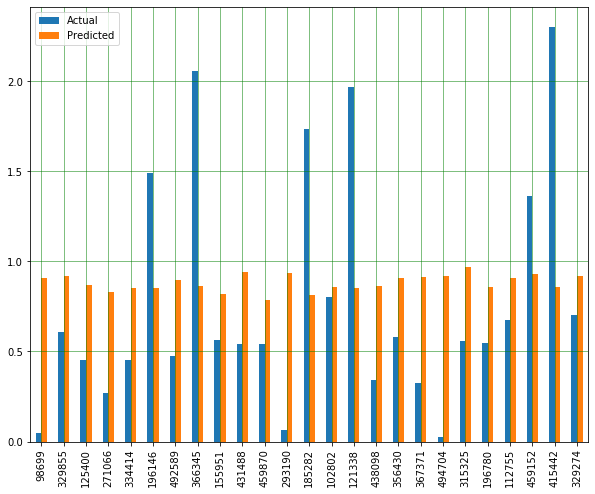

In [12]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [23]:
# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

Intercept: 
 -2.66937502607201
Root Mean Square Error 
 1.0407292572435918
R^2 Value: 
 0.005247156052463953


In [28]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(random_state = 0).fit(X_train, Y_train)

clf

C:\Users\Kenechukwu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [29]:
print('Accuracy of RF Model on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of RF Model on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))

Accuracy of RF Model on training set: 0.58
Accuracy of RF Model on test set: 0.56
